600 800


<Figure size 432x288 with 0 Axes>

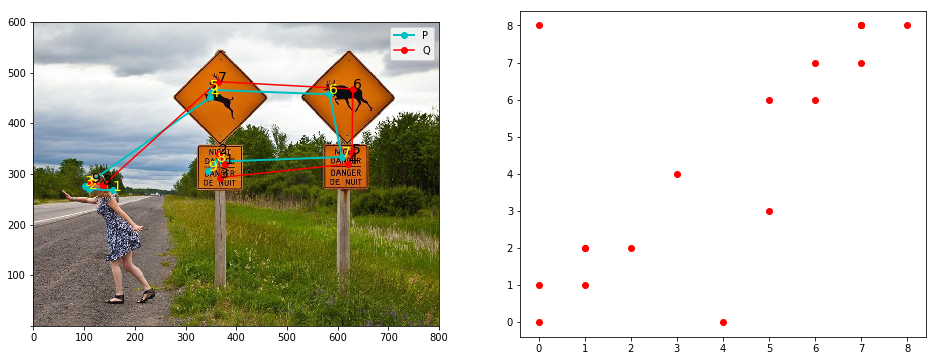

In [108]:


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
from matplotlib.colors import LogNorm
from saliency.utils import scanpath_to_string
from saliency.dataset import SaliencyDataset
from tabulate import tabulate
from PIL import Image
import re
from scipy.spatial.distance import euclidean


d = SaliencyDataset()
d.load('OSIE')

seqs = d.get('sequence', modify='remove') 
imgs = d.get('stimuli_path')
# img_idx = 590
img_idx = 162
P = seqs[img_idx][13]
Q = seqs[img_idx][4]
img = np.array(Image.open(imgs[img_idx]))

# height, width = d.data[0]['img_size']
height, width = img.shape[:2]
print(height, width)
threshold = 2 * 24


def _C(P, Q, threshold):
    assert (P.shape == Q.shape)
    shape = P.shape[0]
    c = np.zeros((shape, shape))

    for i in range(shape):
        for j in range(shape):
            if euclidean(P[i], Q[j]) < threshold:
                c[i,j] = 1
    return c


P = np.array(P, dtype=np.float32)
Q = np.array(Q, dtype=np.float32)
min_len = P.shape[0] if (P.shape[0] < Q.shape[0]) else Q.shape[0]
P = P[:min_len,:2]
Q = Q[:min_len,:2]

c = _C(P, Q, threshold)
R = np.triu(c,1).sum()



fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,6))



ax0.imshow(img)
ax1.set_yticks(range(0, height+100, 100))
# ax1.set_xticks(range(0, width+100, 100))
# ax0.set_xticklabels([''] + list(range(100, width+100, 100)))
ax0.set_yticklabels([''] + list(range(height, 0, -100)))

ax0.plot(P[:,0], P[:,1], 'co-', label='P', linewidth=2)
for fix_idx, fix in enumerate(P[:,:2]):
    ax0.text(fix[0], fix[1], str(fix_idx + 1), color='yellow', fontsize=14)
ax0.plot(Q[:,0],Q[:,1], 'ro-', label='Q')
for fix_idx, fix in enumerate(Q[:,:2]):
    ax0.text(fix[0], fix[1], str(fix_idx + 1), color='black', fontsize=14)
ax0.legend()

# ax0.set_xticks(range(0, width, 100))
# ax0.set_xticklabels([''] + list(range(100, width+100, 100)))
# # ax1.set_yticks(range(0, height+100, 100))
# ax0.set_yticklabels([''] + list(range(height, 0, -100)))


ax1.plot(*zip(*np.where(c==1)), marker='o', color='r', ls='')
ax1.set_xticks(range(c.shape[0]))
ax1.set_yticks(range(c.shape[0]))


plt.savefig('figs/2-2-anderson.png', dpi=600)


In [5]:
print(c)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
print(*zip(*np.where(c==1)))

(1, 2) (3, 5) (4, 6) (5, 6) (6, 5) (7, 2)
